In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\srm\gen-Y\project 1\datac.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


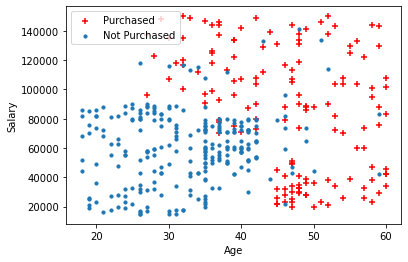

In [5]:
pos , neg = (y==1).reshape(400,1) , (y==0).reshape(400,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(["Purchased","Not Purchased"],loc=0)

In [6]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [7]:
# testing the sigmoid function
sigmoid(0)

0.5

In [8]:
def costFunction(theta, X, y):
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [9]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [10]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.6931471805599467
Gradient at initial theta (zeros): [[ 0.1425    ]
 [-0.29831974]
 [-0.17353327]]


In [11]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [12]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [13]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[-1.13811482]
 [ 2.44456097]
 [ 1.22257273]]
The cost of the optimized theta: 0.34631422799604816


Text(0.5, 1.0, 'Cost function using Gradient Descent')

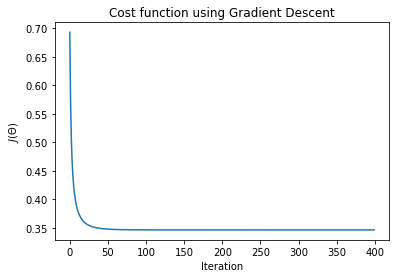

In [14]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

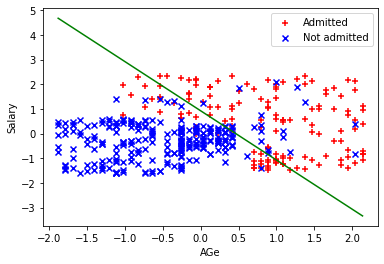

In [15]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("AGe")
plt.ylabel("Salary")
plt.legend(loc=0)

In [16]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

In [18]:
x_test = np.array([21,42000])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 21 and salary 42000, we predict an buying probability of",prob[0])

For a man with age 21 and salary 42000, we predict an buying probability of 0.002416956362165729


In [21]:
x_test = np.array([19,10000])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 19 and salary 10000, we predict an buying probability of",prob[0])

For a man with age 21 and salary 42000, we predict an buying probability of 0.0004812591808169518


In [22]:
x_test = np.array([36,93122])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 36 and salary 39122, we predict an buying probability of",prob[0])

For a man with age 36 and salary 39122, we predict an buying probability of 0.33510234620590523


In [23]:
x_test = np.array([32,23123])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 32 and salary 23123, we predict an buying probability of",prob[0])

For a man with age 32 and salary 23123, we predict an buying probability of 0.015794716575932344


In [24]:
x_test = np.array([48,67000])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 48 and salary 67000, we predict an buying probability of",prob[0])

For a man with age 48 and salary 67000, we predict an buying probability of 0.764742318374473


In [25]:
x_test = np.array([62,32000])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a man with age 62 and salary 32000, we predict an buying probability of",prob[0])

For a man with age 62 and salary 32000, we predict an buying probability of 0.9605003033007251
